# Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Loading the dataset

In [2]:
allchar_dta = pd.read_csv('all_characteristics.csv')

allchar_dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time_period                        630 non-null    int64  
 1   time_identifier                    630 non-null    object 
 2   geographic_level                   630 non-null    object 
 3   country_code                       630 non-null    object 
 4   country_name                       630 non-null    object 
 5   characteristic                     630 non-null    object 
 6   characteristic_detail              630 non-null    object 
 7   progression_rate                   630 non-null    float64
 8   high_tariff_progression_rate       630 non-null    float64
 9   number_of_he_students              630 non-null    int64  
 10  number_of_high_tariff_he_students  630 non-null    int64  
 11  number_of_students                 630 non-null    int64  

In [3]:
allchar_dta.head()


time_period time_identifier geographic_level country_code country_name  \
0       200910   Academic year         National    E92000001      England   
1       200910   Academic year         National    E92000001      England   
2       200910   Academic year         National    E92000001      England   
3       200910   Academic year         National    E92000001      England   
4       200910   Academic year         National    E92000001      England   

  characteristic    characteristic_detail  progression_rate  \
0     FSM Status        Free School Meals              18.6   
1     FSM Status         All Other Pupils              36.2   
2     SEN Status              SEN Support              11.2   
3     SEN Status  SEN with statement/EHCP               5.5   
4     SEN Status        No Identified SEN              39.2   

   high_tariff_progression_rate  number_of_he_students  \
0                           2.0                  14664   
1                           9.4                 187028   
2                           1.3                   9505   
3                           0.7                   1348   
4                          10.0                 190839   

   number_of_high_tariff_he_students  number_of_students  
0                               1537               78802  
1                              48529              516955  
2                               1086               84851  
3                                178               24456  
4                              48802              486450

In [4]:
allchar_dta.shape

(630, 12)

# Finding the missing values

In [5]:
allchar_dta.isna().sum()

time_period                          0
time_identifier                      0
geographic_level                     0
country_code                         0
country_name                         0
characteristic                       0
characteristic_detail                0
progression_rate                     0
high_tariff_progression_rate         0
number_of_he_students                0
number_of_high_tariff_he_students    0
number_of_students                   0
dtype: int64

# changing year label as 200910 as 2010

In [6]:
allchar_dta['year'] = (allchar_dta['time_period'] % 100) + 2000

In [7]:
allcharact_dts = allchar_dta

# Data Visualization: Box Plot

# Finding Outliers

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_70303/2572538812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=allcharact_dts, x='characteristic', y='progression_rate',palette='hls')


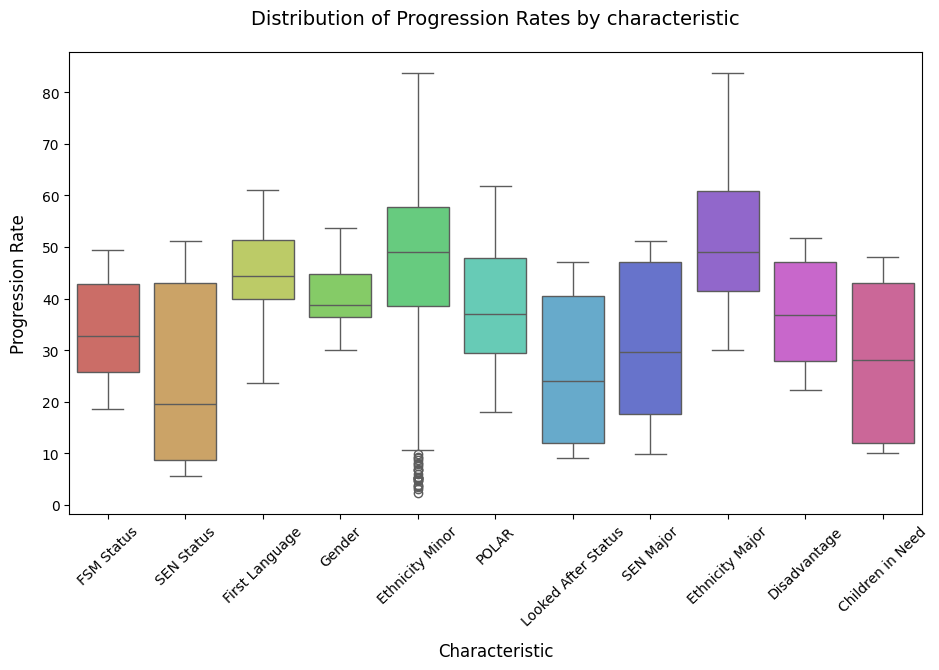

In [8]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=allcharact_dts, x='characteristic', y='progression_rate',palette='hls')
plt.xticks(rotation=44)
plt.title('Distribution of Progression Rates by characteristic', pad = 20,fontsize=14)
plt.xlabel('Characteristic',labelpad = 10,fontsize=12)
plt.ylabel('Progression Rate',labelpad = 10,fontsize=12)
plt.show()

# Removing Outliers Function

In [9]:
def rmve_outliers_mth(passdf):
    filtdata = pd.DataFrame()
    for categdt, grpdt in passdf.groupby('characteristic'):
        firstQ1 = grpdt['progression_rate'].quantile(0.25)
        thirdQ3 = grpdt['progression_rate'].quantile(0.75)
        dtIQR = thirdQ3 - firstQ1
        lwrbnd = firstQ1 - 1.5 * dtIQR
        upbnd = thirdQ3 + 1.5 * dtIQR
        filtgrp = grpdt[(grpdt['progression_rate'] >= lwrbnd) & (grpdt['progression_rate'] <= upbnd)]
        filtdata = pd.concat([filtdata, filtgrp])
    return filtdata


In [10]:

allcharact_dts_outliers1 = rmve_outliers_mth(allcharact_dts)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_70303/182231946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=allcharact_dts_outliers1, x='characteristic', y='progression_rate',palette='hls')


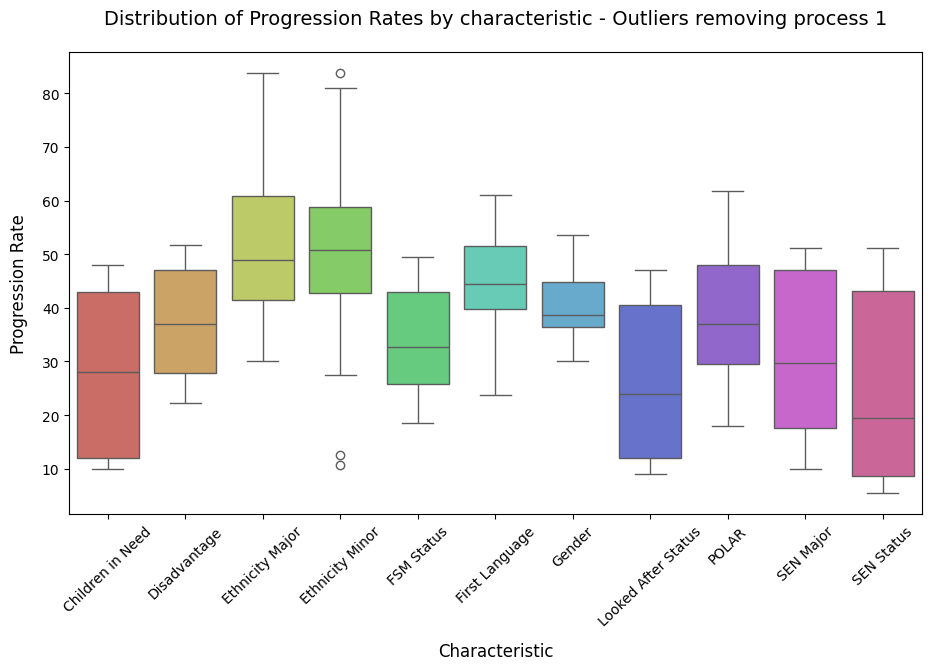

In [11]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=allcharact_dts_outliers1, x='characteristic', y='progression_rate',palette='hls')
plt.xticks(rotation=44)
plt.title('Distribution of Progression Rates by characteristic - Outliers removing process 1', pad = 20,fontsize=14)
plt.xlabel('Characteristic',labelpad = 10,fontsize=12)
plt.ylabel('Progression Rate',labelpad = 10,fontsize=12)
plt.show()

In [12]:

allcharact_dts_outli2 = rmve_outliers_mth(allcharact_dts_outliers1)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_70303/147595313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=allcharact_dts_outli2, x='characteristic', y='progression_rate',palette='hls')


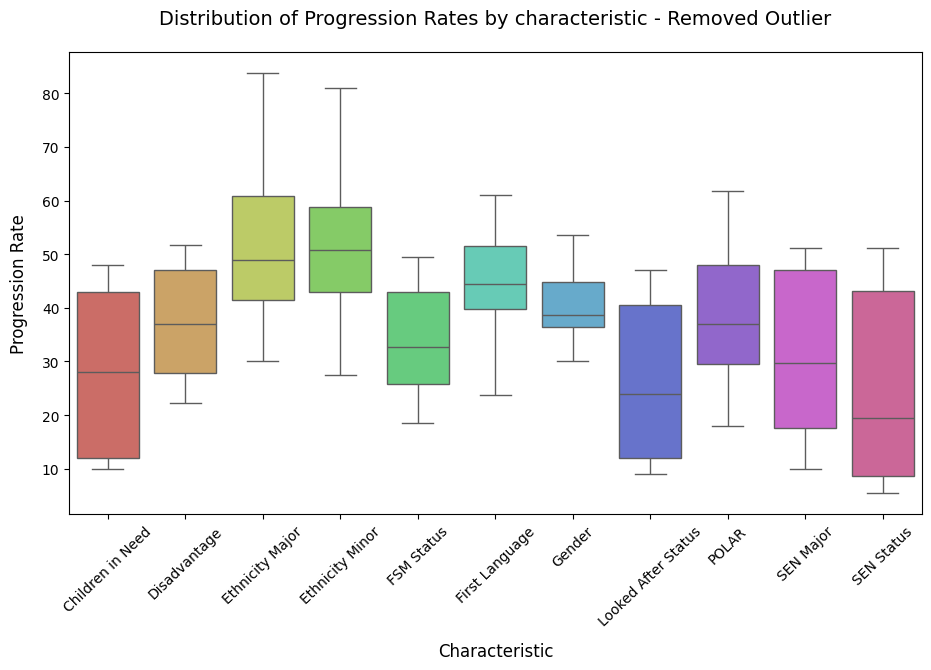

In [13]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=allcharact_dts_outli2, x='characteristic', y='progression_rate',palette='hls')
plt.xticks(rotation=44)
plt.title('Distribution of Progression Rates by characteristic - Removed Outlier', pad = 20,fontsize=14)
plt.xlabel('Characteristic',labelpad = 10,fontsize=12)
plt.ylabel('Progression Rate',labelpad = 10,fontsize=12)
plt.show()

# Plot 2

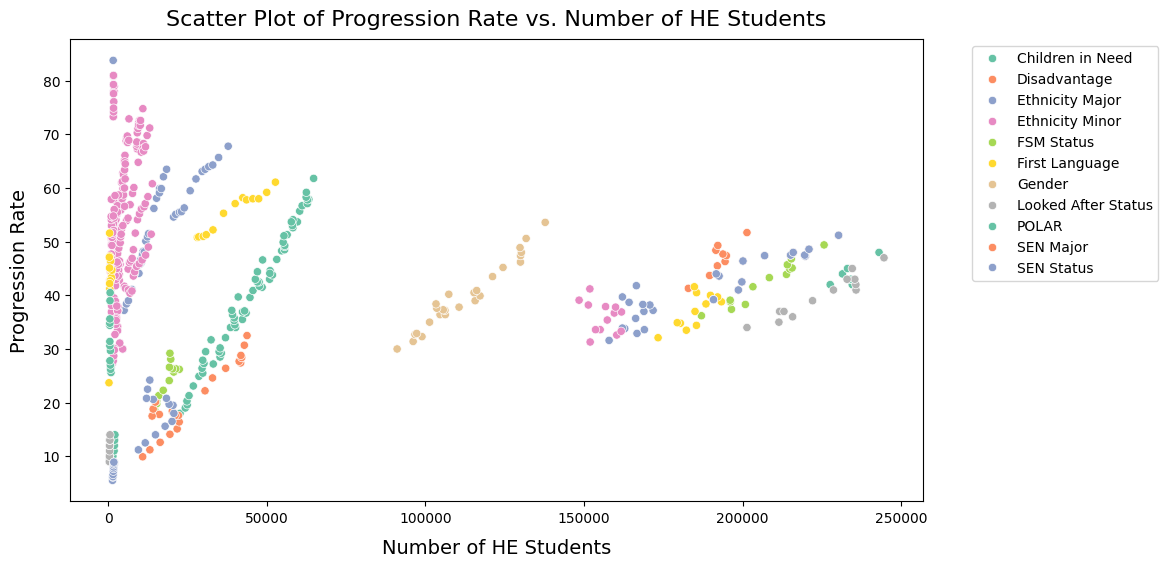

In [14]:

plt.figure(figsize=(11, 6))
sns.scatterplot(data=allcharact_dts_outli2, x='number_of_he_students', y='progression_rate', hue='characteristic', palette='Set2')
plt.title('Scatter Plot of Progression Rate vs. Number of HE Students', pad= 10, fontsize = 16)
plt.xlabel('Number of HE Students',labelpad=10, fontsize=14)
plt.ylabel('Progression Rate',labelpad=10, fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 3 - Histogram plot

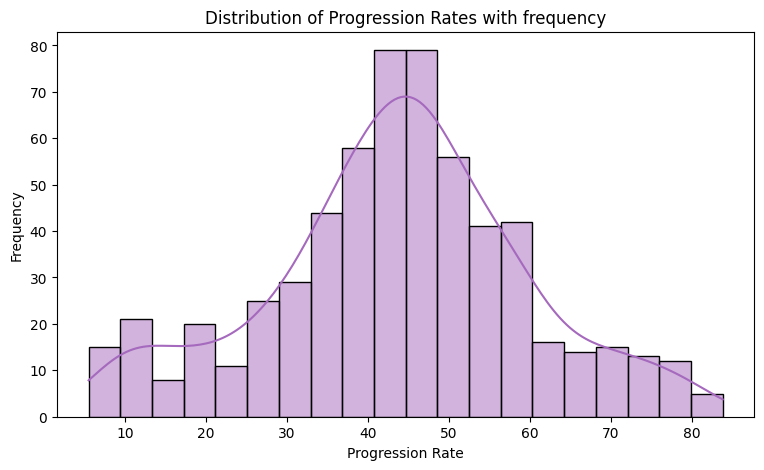

In [15]:

plt.figure(figsize=(9, 5))
sns.histplot(allcharact_dts_outli2['progression_rate'], bins=20, kde=True,color='#A569BD')
plt.title('Distribution of Progression Rates with frequency')
plt.xlabel('Progression Rate')
plt.ylabel('Frequency')
plt.show()

# Plot 4 - pair plot

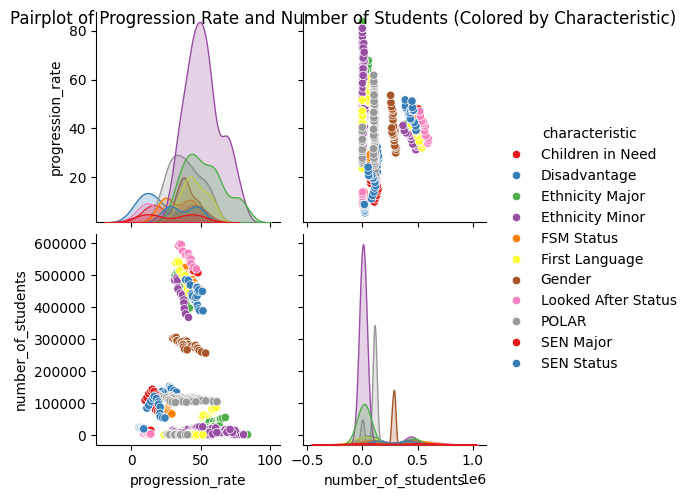

In [16]:

sns.pairplot(allcharact_dts_outli2[['progression_rate', 'number_of_students', 'characteristic']], hue='characteristic', palette='Set1')
plt.suptitle('Pairplot of Progression Rate and Number of Students (Colored by Characteristic)')
plt.show()

# Plot 5: Bar Plot

# changing the year format

In [17]:
allcharact_dts_outli22 = allcharact_dts_outli2.groupby('year')['progression_rate'].mean().reset_index()
allcharact_dts_outli22.head()

year  progression_rate
0  2010         37.625000
1  2011         39.022727
2  2012         39.890909
3  2013         40.843182
4  2014         40.915217

In [18]:


import plotly.express as px

plyfig = px.bar(allcharact_dts_outli22, x='year', y='progression_rate', text='progression_rate', 
             color='year', color_discrete_sequence=px.colors.qualitative.Set1,
             labels={'year': 'Year', 'progression_rate': 'Median Progression Rate'},
             height=450)
plyfig.update_traces(texttemplate='%{text:.1f}', textposition='outside') 
plyfig.update_xaxes(type='category')  
plyfig.update_layout(height=550, width=950)
plyfig.show()


# Tableau plot

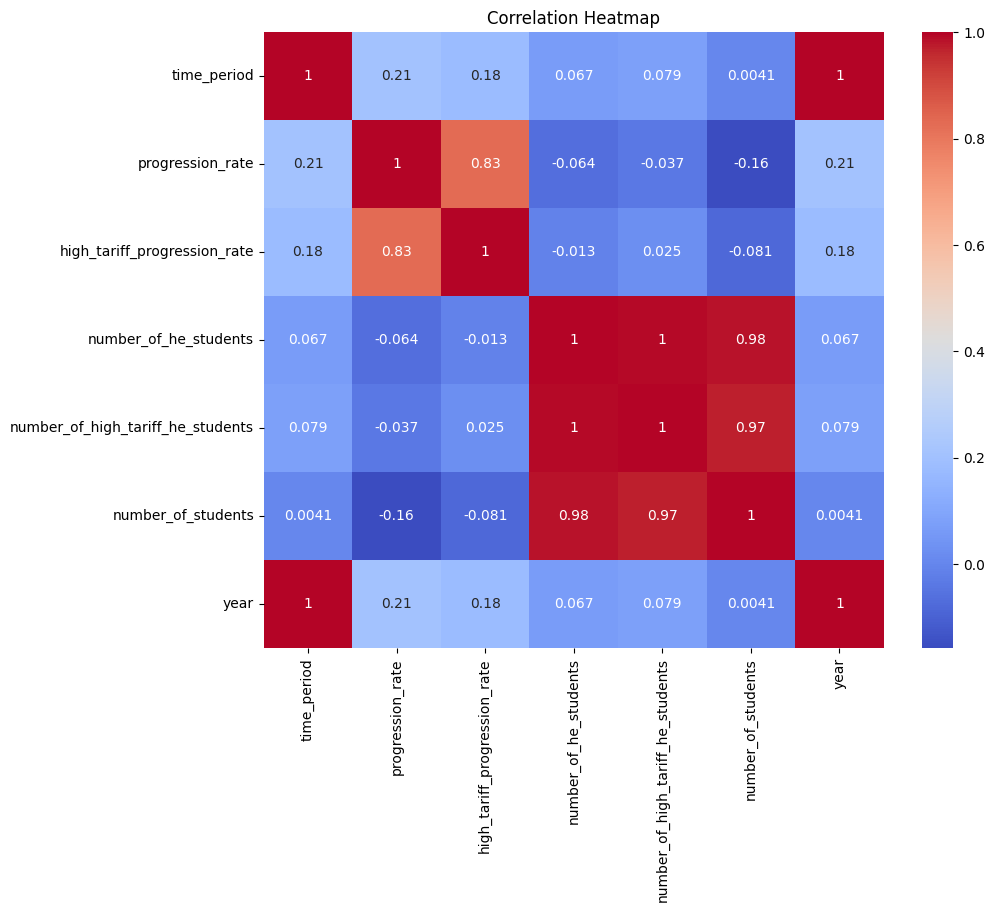

In [19]:
numeric_cols = allcharact_dts_outli2.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

for clname in allcharact_dts_outli2.columns:
    if allcharact_dts_outli2[clname].dtype == 'object':
        lblenc_details = LabelEncoder()
        allcharact_dts_outli2[clname] = lblenc_details.fit_transform(allcharact_dts_outli2[clname])




In [21]:
allcharact_dts_outli2.head()

time_period  time_identifier  geographic_level  country_code  \
319       201516                0                 0             0   
320       201516                0                 0             0   
369       201617                0                 0             0   
370       201617                0                 0             0   
419       201718                0                 0             0   

     country_name  characteristic  characteristic_detail  progression_rate  \
319             0               0                     12              10.0   
320             0               0                      0              42.0   
369             0               0                     12              11.0   
370             0               0                      0              42.0   
419             0               0                     12              12.0   

     high_tariff_progression_rate  number_of_he_students  \
319                           1.0                   1450   
320                          10.0                 227630   
369                           1.0                   1650   
370                          10.0                 234580   
419                           1.0                   1840   

     number_of_high_tariff_he_students  number_of_students  year  
319                                160               14630  2016  
320                              57450              547640  2016  
369                                190               15460  2017  
370                              55600              557490  2017  
419                                240               15950  2018

# Categorising the progression rate

In [22]:

cond_det = [(allcharact_dts_outli2['progression_rate'] < 25),
    (allcharact_dts_outli2['progression_rate'] >= 25) & (allcharact_dts_outli2['progression_rate'] <= 50),
    (allcharact_dts_outli2['progression_rate'] > 50) & (allcharact_dts_outli2['progression_rate'] <= 75),
    (allcharact_dts_outli2['progression_rate'] > 75) & (allcharact_dts_outli2['progression_rate'] <= 100)
]

newlbl = [0,1,2,3]

allcharact_dts_outli2['progression_rate'] = pd.cut(allcharact_dts_outli2['progression_rate'], bins=[-float("inf"), 25, 50, 75, 100], labels=newlbl)

allcharact_dts_outli2['progression_rate'] = allcharact_dts_outli2['progression_rate'].astype(int)

In [23]:
allcharact_dts_outli2.head()

time_period  time_identifier  geographic_level  country_code  \
319       201516                0                 0             0   
320       201516                0                 0             0   
369       201617                0                 0             0   
370       201617                0                 0             0   
419       201718                0                 0             0   

     country_name  characteristic  characteristic_detail  progression_rate  \
319             0               0                     12                 0   
320             0               0                      0                 1   
369             0               0                     12                 0   
370             0               0                      0                 1   
419             0               0                     12                 0   

     high_tariff_progression_rate  number_of_he_students  \
319                           1.0                   1450   
320                          10.0                 227630   
369                           1.0                   1650   
370                          10.0                 234580   
419                           1.0                   1840   

     number_of_high_tariff_he_students  number_of_students  year  
319                                160               14630  2016  
320                              57450              547640  2016  
369                                190               15460  2017  
370                              55600              557490  2017  
419                                240               15950  2018

# Finding unique values in each row

In [24]:
unique_prgval = allcharact_dts_outli2.nunique()
print("Number of unique values\n", unique_prgval)


Number of unique values
 time_period                           13
time_identifier                        1
geographic_level                       1
country_code                           1
country_name                           1
characteristic                        11
characteristic_detail                 40
progression_rate                       4
high_tariff_progression_rate         194
number_of_he_students                541
number_of_high_tariff_he_students    522
number_of_students                   546
year                                  13
dtype: int64


# Dropping unnecessary columns

In [25]:
colto_drop = ['time_period','time_identifier', 'country_code','country_name','geographic_level']

allcharact_dts_outli2 = allcharact_dts_outli2.drop(columns=colto_drop)

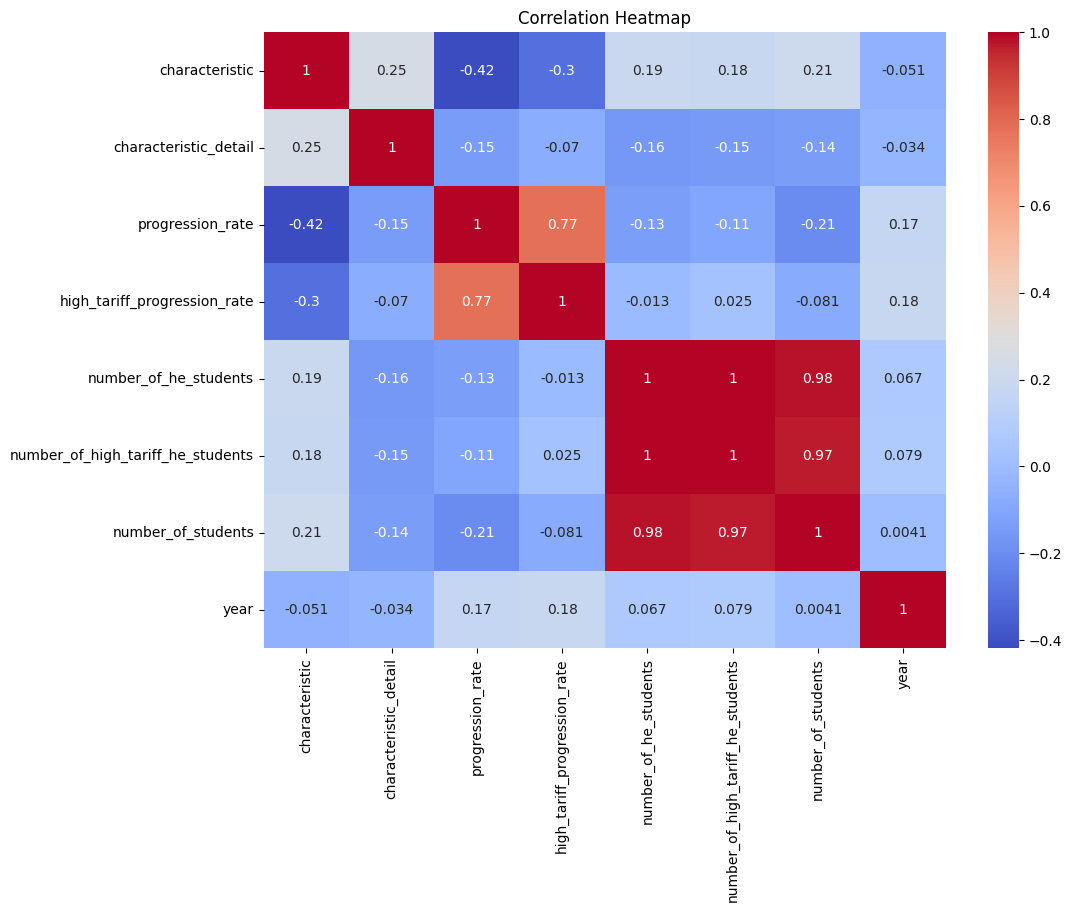

In [26]:
correlationM_det = allcharact_dts_outli2.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(correlationM_det, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
allcharact_dts_outli2.drop('high_tariff_progression_rate', axis=1, inplace=True)
allcharact_dts_outli2.drop('number_of_high_tariff_he_students', axis=1, inplace=True)

# Training the Data

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split



In [29]:

xdata = allcharact_dts_outli2.drop(['progression_rate'], axis=1)  
ydata = allcharact_dts_outli2['progression_rate']

# Standard Scalar

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
x_scdata = StandardScaler().fit_transform(xdata)

In [32]:
x_scdata

array([[-1.67289191, -0.56651933, -0.66249675, -0.62146219, -0.03211134],
       [-1.67289191, -1.55957502,  2.42990879,  2.38941889, -0.03211134],
       [-1.67289191, -0.56651933, -0.65976229, -0.61677367,  0.23682114],
       ...,
       [ 2.0019854 ,  0.9230642 , -0.50322789, -0.39874025,  1.58148355],
       [ 2.0019854 ,  1.00581884, -0.65814896, -0.5915912 ,  1.58148355],
       [ 2.0019854 ,  0.26102707,  2.46608575,  1.83794654,  1.58148355]])

In [33]:
x_traindts,x_testdts,y_traindts,y_testdts = train_test_split(x_scdata,ydata,test_size = 0.2, random_state=0)

# Algorithms

# Logistic Regression with hyper parameter tuning

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [35]:
from time import time
parlogi_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,200],
    'penalty': ['l1', 'l2']
}
logreg_gdcv = GridSearchCV(LogisticRegression(), param_grid=parlogi_reg,cv=7, n_jobs=-1)
logreg_gdcv.fit(x_traindts,y_traindts)
logi_bstparm = logreg_gdcv.best_params_
logi_bstscore = logreg_gdcv.best_score_
print("Best_parameters : ", logi_bstparm)
print("Best_score :",logi_bstscore)





Best_parameters :  {'C': 200, 'penalty': 'l2'}
Best_score : 0.8631104615759347


/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

### Building model

Complete time to build and evaluate :  0.07410478591918945
 Logistic_Regression accuracy details : 0.8760330578512396
 Logistic_Regression mean squared error details: 0.35208939510976517


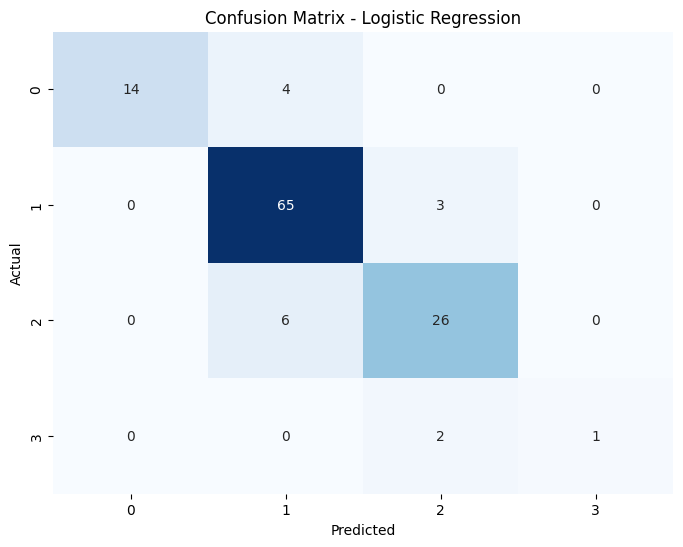


classification report: 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.87      0.96      0.91        68
           2       0.84      0.81      0.83        32
           3       1.00      0.33      0.50         3

    accuracy                           0.88       121
   macro avg       0.93      0.72      0.78       121
weighted avg       0.88      0.88      0.87       121



In [46]:
from time import time
import numpy as np

logistart_tm = time()

logireg_mdl = LogisticRegression(penalty= 'l2', C = 200,max_iter=1100)
logireg_mdl.fit(x_traindts,y_traindts)
logi_ypred = logireg_mdl.predict(x_testdts)

logireg_score = logireg_mdl.score(x_testdts,y_testdts)

logiend_tm = time()

logireg_mse = np.sqrt(mean_squared_error(y_testdts,logi_ypred))

logireg_clsrpt = classification_report(y_testdts,logi_ypred)

#confusion matrix
logireg_cfnmtx = confusion_matrix(y_testdts,logi_ypred)

print("Complete time to build and evaluate : ", logiend_tm-logistart_tm)
print(" Logistic_Regression accuracy details :",logireg_score)
print(" Logistic_Regression mean squared error details:",logireg_mse)

plt.figure(figsize=(8, 6))
sns.heatmap(logireg_cfnmtx, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nclassification report: \n")

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(logireg_clsrpt)

# 2 Decision Tree with Hyper Parameter Tuning

In [37]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
decparm = {
    'criterion': ['gini', "entropy"],
    'max_depth': [a for a in range(1, 65, 5)], 
    'min_samples_leaf': [b for b in range(1, 21, 1)]}
dectr_gd = GridSearchCV(DecisionTreeClassifier(), param_grid=decparm, cv=5) 
dectr_gd.fit(x_traindts, y_traindts)


print(" Best parameters : ",dectr_gd.best_params_)
print("Best score : ",dectr_gd.best_score_)

 Best parameters :  {'criterion': 'gini', 'max_depth': 56, 'min_samples_leaf': 1}
Best score :  0.9294029209621992


Decision Tree Algorithm:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 time 0.005683183670043945

Score : 0.9586776859504132
 Confusion matrix :


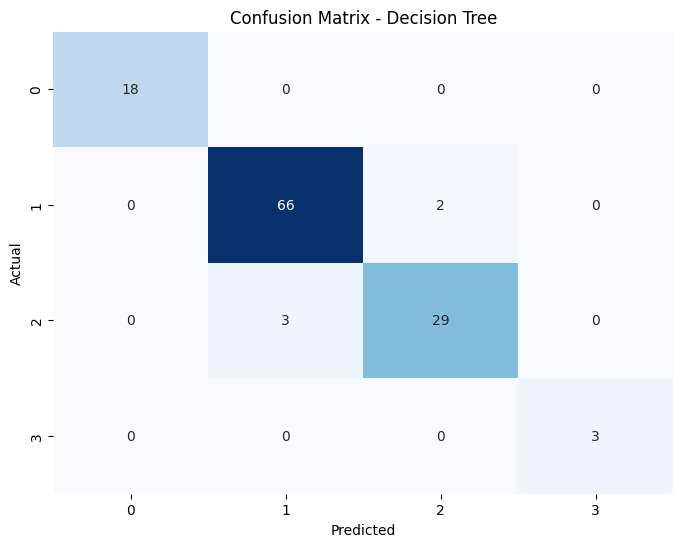


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.96      0.97      0.96        68
           2       0.94      0.91      0.92        32
           3       1.00      1.00      1.00         3

    accuracy                           0.96       121
   macro avg       0.97      0.97      0.97       121
weighted avg       0.96      0.96      0.96       121



In [48]:
logistart_tm = time()
dectr_modl = DecisionTreeClassifier(criterion = 'entropy', max_depth = 50,min_samples_leaf = 1)
dectr_modl.fit(x_traindts,y_traindts)
logiend_tm = time()
dectr_ypred = dectr_modl.predict(x_testdts)
dectr_scr = dectr_modl.score(x_testdts,y_testdts)
dectr_confm = confusion_matrix(y_testdts,dectr_ypred)
dectr_clssrpt = classification_report(y_testdts,dectr_ypred)
print("Decision Tree Algorithm:")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(" time",logiend_tm-logistart_tm)
print("\nScore :",dectr_scr)
print(" Confusion matrix :")
plt.figure(figsize=(8, 6))
sns.heatmap(dectr_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report :")
print(dectr_clssrpt)


# Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
randfst_parm = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": range(200, 1200, 200)}
randfst_gdcv = GridSearchCV(RandomForestClassifier(), param_grid=randfst_parm, cv=5)
randfst_gdcv.fit(x_traindts, y_traindts)
print('Best Random Forest attributes:', randfst_gdcv.best_params_)
print('Best random forest Score:', randfst_gdcv.best_score_)

Best Random Forest attributes: {'criterion': 'gini', 'n_estimators': 400}
Best random forest Score: 0.956421821305842


Random forest Evaluation
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
time :  0.5566651821136475
 score:  0.9669421487603306


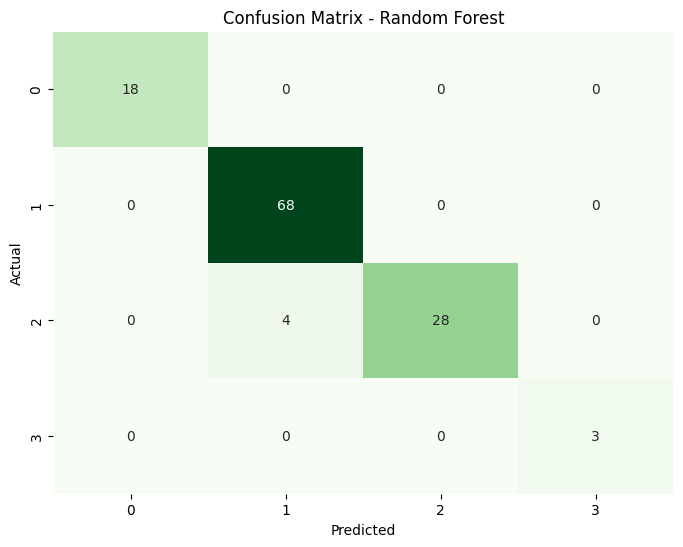


classification report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      1.00      0.97        68
           2       1.00      0.88      0.93        32
           3       1.00      1.00      1.00         3

    accuracy                           0.97       121
   macro avg       0.99      0.97      0.98       121
weighted avg       0.97      0.97      0.97       121



In [42]:
rndmfst_st = time()
rndmfst_mdl = RandomForestClassifier(criterion="gini", max_depth= 20,n_estimators=1000)
rndmfst_mdl.fit(x_traindts, y_traindts)
rndmfst_ed = time()
rndmfst_ypred = rndmfst_mdl.predict(x_testdts)

rndmfst_scr = rndmfst_mdl.score(x_testdts,y_testdts)
rndmfst_confm = confusion_matrix(y_testdts,rndmfst_ypred)
rndmfst_clsrpt = classification_report(y_testdts,rndmfst_ypred)

print("Random forest Evaluation")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("time : ",rndmfst_ed-rndmfst_st)
print(" score: ",rndmfst_scr)

plt.figure(figsize=(8, 6))
sns.heatmap(rndmfst_confm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nclassification report :\n")
print(rndmfst_clsrpt)



# 4. Bagging Classifier with Decision Tree

Bagging classifier
 total time taken : 0.9737071990966797
Accuracy score: 0.9586776859504132


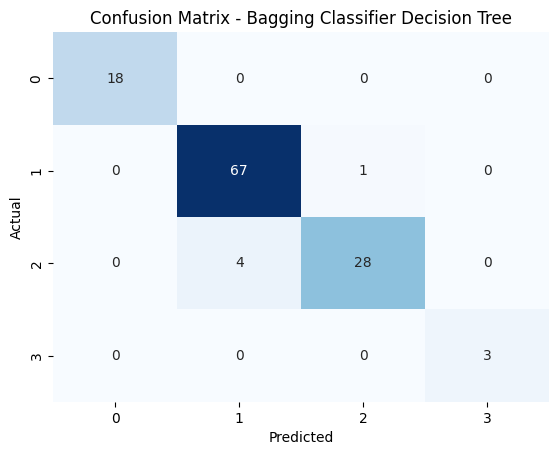

 Bagging classifier score : 0.9586776859504132
classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.99      0.96        68
           2       0.97      0.88      0.92        32
           3       1.00      1.00      1.00         3

    accuracy                           0.96       121
   macro avg       0.98      0.97      0.97       121
weighted avg       0.96      0.96      0.96       121



In [43]:
from sklearn.ensemble import BaggingClassifier

baggdt_str = time()
baggdt_clsmdl = BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 30,min_samples_leaf = 1), n_estimators=950, bootstrap=True)
baggdt_clsmdl.fit(x_traindts, y_traindts)

baggdt_ypred = baggdt_clsmdl.predict(x_testdts)

baggdt_scr = baggdt_clsmdl.score(x_testdts,y_testdts)

baggdt_confm = confusion_matrix(y_testdts,baggdt_ypred)
baggdt_clsrpt = classification_report(y_testdts,baggdt_ypred)
baggdt_ed = time()
print("Bagging classifier")
print("==============================")
print(" total time taken :",baggdt_ed-baggdt_str )
print("Accuracy score:",baggdt_scr)
sns.heatmap(baggdt_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Bagging Classifier Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(" Bagging classifier score :",baggdt_scr)
print("classification report :")
print(baggdt_clsrpt)

# 6. Gradient Boosting 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier


Gradient Boosting Algorithm 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Time:  0.7931318283081055
 
accuracy :  0.9586776859504132


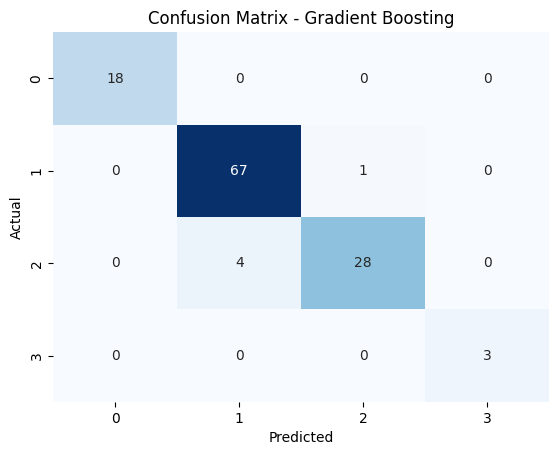

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.99      0.96        68
           2       0.97      0.88      0.92        32
           3       1.00      1.00      1.00         3

    accuracy                           0.96       121
   macro avg       0.98      0.97      0.97       121
weighted avg       0.96      0.96      0.96       121



In [49]:
gradi_stm = time()
gradibst_mdl = GradientBoostingClassifier(n_estimators=900,learning_rate=0.7,
                                          min_samples_leaf=4,
                                          max_depth=15)
gradibst_mdl.fit(x_traindts,y_traindts)

gradibst_ypred = gradibst_mdl.predict(x_testdts)

gradibst_score = gradibst_mdl.score(x_testdts,y_testdts)

gradibst_confm = confusion_matrix(y_testdts,gradibst_ypred)


gradibst_clsrpt = classification_report(y_testdts,gradibst_ypred)
gradi_edtm = time()
print("Gradient Boosting Algorithm ")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("\nTime: ",gradi_edtm-gradi_stm)
print(" \naccuracy : ",gradibst_score)

sns.heatmap(gradibst_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report : \n",gradibst_clsrpt)